## Requirements
1. Create a new function called `toggle_dark_mode(ax=None, fig=None)` that:
   - Can be applied to either a specific axis, a figure, or the current figure if none is specified
   - Converts the plot background to a dark color (e.g., #121212)
   - Inverts text colors from dark to light
   - Adjusts plot elements (grid lines, tick marks, etc.) to be visible on dark background
   - Preserves the original colors of data elements (lines, points, bars) or provides an option to adjust them for better visibility
2. The function should be reversible (calling it again should toggle back to light mode)
3. Create a simple demo script showing the functionality in action

In [1]:
import matplotlib.pyplot as plt
import matplotlib

def invert_color(c):
    if (c == None):
        c = 'black'
    if (type(c) == str):
        c = matplotlib.colors.to_rgb(c)
    return (1.-c[0],1-c[1],1-c[2])

def invert_text_color(txt):
    txt._color = invert_color(txt._color)

def invert_tick_color(xs):
    tp = xs.get_tick_params()
    tc = tp['color'] if 'color' in tp else None
    xs.set_tick_params(colors=invert_color(tc))

def toggle_dark_mode_axis(ax):
    ax.set_facecolor(invert_color(ax.get_facecolor()))
    invert_text_color(ax.title)
    invert_text_color(ax.xaxis.label)
    invert_text_color(ax.yaxis.label)
    for t in ax.texts:
        invert_text_color(t)
    invert_tick_color(ax.yaxis)
    invert_tick_color(ax.xaxis)

def toggle_dark_mode(ax=None, fig=None):
    if (ax==None and fig==None):
        fig = plt.gcf()
    if (fig != None):
        fig.set_facecolor(invert_color(fig.get_facecolor()))
        ax_list = fig.axes
    else:
        ax_list = [ax]
    # Now, run on our axes
    for ax in ax_list:
        toggle_dark_mode_axis(ax)

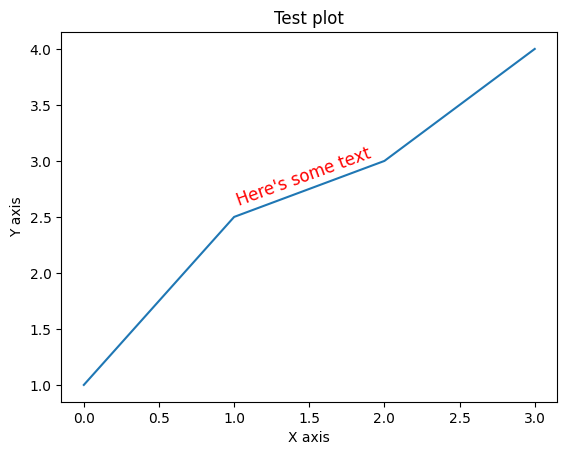

In [2]:
fig, ax = plt.subplots()
ax.plot([1, 2.5, 3, 4])
plt.title("Test plot")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
plt.text(1, 2.6, "Here's some text", fontsize=12, color='red', rotation=20)
plt.show()


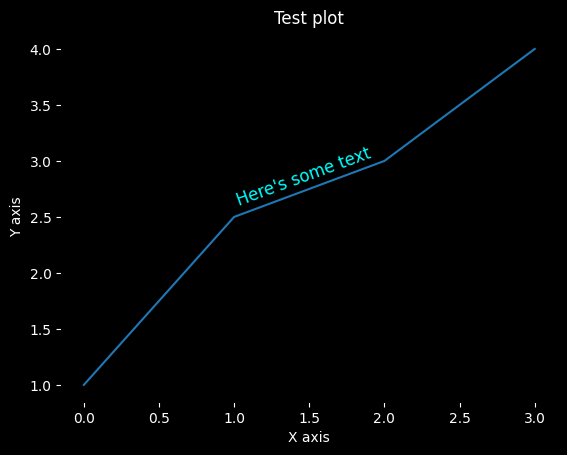

In [3]:
toggle_dark_mode(fig=fig)
display(fig)

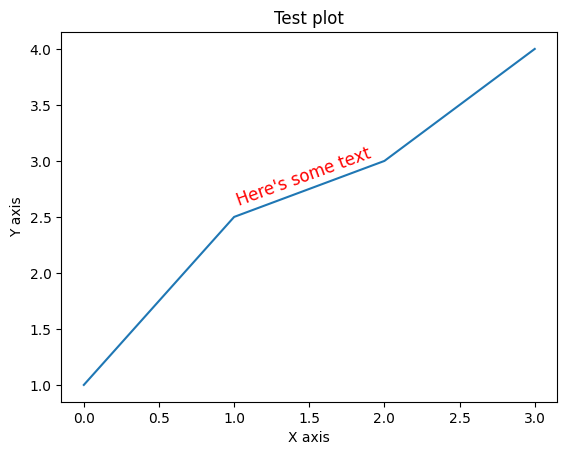

In [4]:
toggle_dark_mode(fig=fig)
display(fig)